<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Predicting-Covid-Cases-From-Google-Search-Data:-A-Time-Series-Analysis" data-toc-modified-id="Predicting-Covid-Cases-From-Google-Search-Data:-A-Time-Series-Analysis-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Predicting Covid Cases From Google Search Data: A Time Series Analysis</a></span></li><li><span><a href="#Business-and-Data-Understanding" data-toc-modified-id="Business-and-Data-Understanding-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Business and Data Understanding</a></span><ul class="toc-item"><li><span><a href="#Business-Problem" data-toc-modified-id="Business-Problem-2.1"><span class="toc-item-num">2.1&nbsp;&nbsp;</span>Business Problem</a></span></li><li><span><a href="#Data" data-toc-modified-id="Data-2.2"><span class="toc-item-num">2.2&nbsp;&nbsp;</span>Data</a></span><ul class="toc-item"><li><span><a href="#Limitations-of-the-dataset" data-toc-modified-id="Limitations-of-the-dataset-2.2.1"><span class="toc-item-num">2.2.1&nbsp;&nbsp;</span>Limitations of the dataset</a></span></li><li><span><a href="#Why-We-Used-This-Dataset" data-toc-modified-id="Why-We-Used-This-Dataset-2.2.2"><span class="toc-item-num">2.2.2&nbsp;&nbsp;</span>Why We Used This Dataset</a></span></li><li><span><a href="#Dataset-Size" data-toc-modified-id="Dataset-Size-2.2.3"><span class="toc-item-num">2.2.3&nbsp;&nbsp;</span>Dataset Size</a></span></li></ul></li></ul></li><li><span><a href="#Initial-Look-at-the-Data" data-toc-modified-id="Initial-Look-at-the-Data-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Initial Look at the Data</a></span><ul class="toc-item"><li><span><a href="#Imports" data-toc-modified-id="Imports-3.1"><span class="toc-item-num">3.1&nbsp;&nbsp;</span>Imports</a></span></li><li><span><a href="#Data-Preprocessing" data-toc-modified-id="Data-Preprocessing-3.2"><span class="toc-item-num">3.2&nbsp;&nbsp;</span>Data Preprocessing</a></span><ul class="toc-item"><li><span><a href="#Google-Search-Data" data-toc-modified-id="Google-Search-Data-3.2.1"><span class="toc-item-num">3.2.1&nbsp;&nbsp;</span>Google Search Data</a></span></li><li><span><a href="#Public-COVID-19-PA-Data" data-toc-modified-id="Public-COVID-19-PA-Data-3.2.2"><span class="toc-item-num">3.2.2&nbsp;&nbsp;</span>Public COVID-19 PA Data</a></span></li><li><span><a href="#Joining-the-Google-and-Public-COVID-19-Data" data-toc-modified-id="Joining-the-Google-and-Public-COVID-19-Data-3.2.3"><span class="toc-item-num">3.2.3&nbsp;&nbsp;</span>Joining the Google and Public COVID-19 Data</a></span></li></ul></li><li><span><a href="#Initial-Visualizations" data-toc-modified-id="Initial-Visualizations-3.3"><span class="toc-item-num">3.3&nbsp;&nbsp;</span>Initial Visualizations</a></span><ul class="toc-item"><li><span><a href="#Test-Train-Split:-Target-Variable" data-toc-modified-id="Test-Train-Split:-Target-Variable-3.3.1"><span class="toc-item-num">3.3.1&nbsp;&nbsp;</span>Test Train Split: Target Variable</a></span></li></ul></li></ul></li><li><span><a href="#Base-Model-of-the-Target-Variable" data-toc-modified-id="Base-Model-of-the-Target-Variable-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Base Model of the Target Variable</a></span></li><li><span><a href="#Multivariate-Time-Series-Model" data-toc-modified-id="Multivariate-Time-Series-Model-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Multivariate Time Series Model</a></span><ul class="toc-item"><li><span><a href="#PCA" data-toc-modified-id="PCA-5.1"><span class="toc-item-num">5.1&nbsp;&nbsp;</span>PCA</a></span><ul class="toc-item"><li><span><a href="#Granger-Causality-Test" data-toc-modified-id="Granger-Causality-Test-5.1.1"><span class="toc-item-num">5.1.1&nbsp;&nbsp;</span>Granger Causality Test</a></span></li></ul></li><li><span><a href="#VAR-model" data-toc-modified-id="VAR-model-5.2"><span class="toc-item-num">5.2&nbsp;&nbsp;</span>VAR model</a></span></li></ul></li><li><span><a href="#Final-Model-Evaluation" data-toc-modified-id="Final-Model-Evaluation-6"><span class="toc-item-num">6&nbsp;&nbsp;</span>Final Model Evaluation</a></span></li><li><span><a href="#Conclusion" data-toc-modified-id="Conclusion-7"><span class="toc-item-num">7&nbsp;&nbsp;</span>Conclusion</a></span><ul class="toc-item"><li><span><a href="#Summary-of-Analysis" data-toc-modified-id="Summary-of-Analysis-7.1"><span class="toc-item-num">7.1&nbsp;&nbsp;</span>Summary of Analysis</a></span></li><li><span><a href="#Recommendations" data-toc-modified-id="Recommendations-7.2"><span class="toc-item-num">7.2&nbsp;&nbsp;</span>Recommendations</a></span></li><li><span><a href="#Next-Steps" data-toc-modified-id="Next-Steps-7.3"><span class="toc-item-num">7.3&nbsp;&nbsp;</span>Next Steps</a></span></li></ul></li></ul></div>

# Predicting Covid Cases From Google Search Data: A Time Series Analysis

# Business and Data Understanding

## Business Problem

The city of Philadelphia has been tracking its COVID-19 cases since the beginning of the pandemic. They want to know if they can use Google's COVID-19 related search data to better predict COVID-19 rates. If a model to give advanced warning could be made it would give the city of Philadelphia time to be able to prepare for spikes in COVID-19 cases and increase preventative measures (mask mandates, encouraging social distancing, warn hospitals, etc.) when needed.

## Data

In order to do this analysis, there were two data sets that we put together. 

The independent variables were taken from [Google's Explore COVID-19 Symptoms Search Trends](https://pair-code.github.io/covid19_symptom_dataset/?country=IE). The data was downloaded from the USA region (sub region of Pennsylvania) at the daily resolution. All of the data from January 1st, 2020 through November 11th, 2022 was then collated into one data frame, containing 68,805 rows and 430 columns. This data had all been [scaled and normalized](https://storage.googleapis.com/gcp-public-data-symptom-search/COVID-19%20Search%20Trends%20symptoms%20dataset%20documentation%20.pdf) prior to being downloaded. 

The target variable was taken from [COVID-19 Data for Pennsylvania](https://www.health.pa.gov/topics/disease/coronavirus/pages/Cases.aspx). This data spanned from March 1st, 2020 until March 14, 2023 and included 75,412 rows and 12 columns. 

### Limitations of the dataset

While these two datasets do include a fairly comprehensive list of the search terms and COVID-19 case counts, they do not include all of the possible elements relevant to the rise and fall of COVID-19 cases - for example they don't take into account the proliferation of novel versions of the virus (e.g. Delta, Omicron, etc.). The dataset is also limited by time - [COVID-19 was only proclaimed a pandemic by the World Health Organization on March 11th, 2020](https://www.yalemedicine.org/news/covid-timeline). As such, it could be that better predictions will be available as more time passes, allowing for more data to be collected. 

### Why We Used This Dataset

As the initial inquiry was about if search trends could be used to predict COVID-19, we felt that these data sets were a perfect place to start! Google is a leading search engine, so it seemed an intuitive place to collect search data from. All of the acquired data was free and publicly available. 

### Dataset Size

Initially, we had two datasets, one with **68,805** rows and **430** columns, the other with **75,412** rows and **12** columns. After subsetting these datasets to include **only the Philadelphia region**, cleaning the data, and matching the dates of the datasets, we had **991** rows (representing from March 8th, 2020 to November 13th, 2022) and **423** columns.



# Initial Look at the Data
 
 
## Imports

In [1]:
# imports
from statsmodels.tsa.statespace.varmax import VARMAX
from statsmodels.tsa.api import VAR
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from scipy.stats import pearsonr
import statsmodels.api as sm
import pmdarima as pm
import seaborn as sns
import pandas as pd
import numpy as np
from numpy import log
from datetime import datetime, timedelta
from statsmodels.tsa.stattools import grangercausalitytests, adfuller
from sklearn.decomposition import PCA
from sklearn import preprocessing
import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('fivethirtyeight')

In [2]:
# bringing in our 4 dataframes

public_data = pd.read_csv(
    "data/COVID-19_Aggregate_Cases_Current_Weekly_County_Health.csv")
google_data_2020 = pd.read_csv(
    "data/2020_sub_region_1_daily_2020_US_Pennsylvania_daily_symptoms_dataset.csv",  dtype=str)
google_data_2021 = pd.read_csv(
    "data/2021_sub_region_1_daily_2021_US_Pennsylvania_daily_symptoms_dataset(1).csv", dtype=str)
google_data_2022 = pd.read_csv(
    "data/2022_sub_region_1_daily_2022_US_Pennsylvania_daily_symptoms_dataset(1).csv", dtype=str)

## Data Preprocessing

### Google Search Data

Let's start by consolidating all of our separate Google files into one data frame. 

In [3]:
# consolidating the google data into one dataframe
google_dataframes = [google_data_2020, google_data_2021, google_data_2022]
google_data = pd.concat(google_dataframes)
google_data.head()

,country_region_code,country_region,sub_region_1,sub_region_1_code,sub_region_2,sub_region_2_code,place_id,date,symptom:Abdominal obesity,symptom:Abdominal pain,...,symptom:Wart,symptom:Water retention,symptom:Weakness,symptom:Weight gain,symptom:Wheeze,symptom:Xeroderma,symptom:Xerostomia,symptom:Yawn,symptom:hyperhidrosis,symptom:pancreatitis
0,US,United States,Pennsylvania,US-PA,NaN,NaN,ChIJieUyHiaALYgRPbQiUEchRsI,2020-01-01,2.37,4.85,...,1.22,0.24,0.34,3.29,0.38,2.49,0.35,0.16,0.47,0.38
1,US,United States,Pennsylvania,US-PA,NaN,NaN,ChIJieUyHiaALYgRPbQiUEchRsI,2020-01-02,2.28,4.74,...,1.34,0.24,0.4,3.39,0.38,2.4,0.4,0.16,0.53,0.45
2,US,United States,Pennsylvania,US-PA,NaN,NaN,ChIJieUyHiaALYgRPbQiUEchRsI,2020-01-03,2.04,4.62,...,1.23,0.23,0.38,3.17,0.34,2.19,0.38,0.16,0.51,0.41
3,US,United States,Pennsylvania,US-PA,NaN,NaN,ChIJieUyHiaALYgRPbQiUEchRsI,2020-01-04,2.25,4.83,...,1.22,0.26,0.4,3.15,0.32,2.46,0.39,0.17,0.54,0.35
4,US,United States,Pennsylvania,US-PA,NaN,NaN,ChIJieUyHiaALYgRPbQiUEchRsI,2020-01-05,2.5,4.7,...,1.19,0.25,0.37,3.38,0.34,2.5,0.38,0.16,0.53,0.36


In [4]:
# looking at the size and makeup of our dataframe
google_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 68805 entries, 0 to 20826
Columns: 430 entries, country_region_code to symptom:pancreatitis
dtypes: object(430)
memory usage: 226.2+ MB


Now, let's extract *only* the data relevant to Philadelphia and clean up our dataset a bit.

In [5]:
google_philly = google_data[google_data.sub_region_2 == 'Philadelphia County']
google_philly.head()

,country_region_code,country_region,sub_region_1,sub_region_1_code,sub_region_2,sub_region_2_code,place_id,date,symptom:Abdominal obesity,symptom:Abdominal pain,...,symptom:Wart,symptom:Water retention,symptom:Weakness,symptom:Weight gain,symptom:Wheeze,symptom:Xeroderma,symptom:Xerostomia,symptom:Yawn,symptom:hyperhidrosis,symptom:pancreatitis
17934,US,United States,Pennsylvania,US-PA,Philadelphia County,42101,ChIJ60u11Ni3xokRhBCHQtzJmsM,2020-01-01,2.35,4.46,...,1.09,0.2,0.31,2.95,0.32,2.55,0.31,0.19,0.37,0.25
17935,US,United States,Pennsylvania,US-PA,Philadelphia County,42101,ChIJ60u11Ni3xokRhBCHQtzJmsM,2020-01-02,2.37,4.17,...,1.14,0.19,0.37,3.01,0.27,2.63,0.34,0.14,0.5,0.34
17936,US,United States,Pennsylvania,US-PA,Philadelphia County,42101,ChIJ60u11Ni3xokRhBCHQtzJmsM,2020-01-03,2.13,4.18,...,1.08,0.17,0.32,2.95,0.29,2.46,0.3,0.18,0.51,0.3
17937,US,United States,Pennsylvania,US-PA,Philadelphia County,42101,ChIJ60u11Ni3xokRhBCHQtzJmsM,2020-01-04,2.37,4.5,...,1.1,0.18,0.37,3.26,0.28,2.78,0.42,0.24,0.48,0.27
17938,US,United States,Pennsylvania,US-PA,Philadelphia County,42101,ChIJ60u11Ni3xokRhBCHQtzJmsM,2020-01-05,2.36,4.12,...,1.12,0.21,0.28,3.21,0.25,2.82,0.35,0.2,0.49,0.24


In [6]:
# removing extraneous columns from our `google_data`
google_philly.drop(columns=["sub_region_2", "sub_region_2_code", "country_region_code", "country_region", "sub_region_1",
                            "sub_region_1_code", "place_id"], inplace=True)

google_philly.head()

/var/folders/nz/h8wmnpz55qb3srn4_mj451lc0000gn/T/ipykernel_20167/3665995247.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  google_philly.drop(columns=["sub_region_2", "sub_region_2_code", "country_region_code", "country_region", "sub_region_1",


,date,symptom:Abdominal obesity,symptom:Abdominal pain,symptom:Acne,symptom:Actinic keratosis,symptom:Acute bronchitis,symptom:Adrenal crisis,symptom:Ageusia,symptom:Alcoholism,symptom:Allergic conjunctivitis,...,symptom:Wart,symptom:Water retention,symptom:Weakness,symptom:Weight gain,symptom:Wheeze,symptom:Xeroderma,symptom:Xerostomia,symptom:Yawn,symptom:hyperhidrosis,symptom:pancreatitis
17934,2020-01-01,2.35,4.46,7.76,0.19,0.62,0.09,NaN,5.11,NaN,...,1.09,0.2,0.31,2.95,0.32,2.55,0.31,0.19,0.37,0.25
17935,2020-01-02,2.37,4.17,8.13,0.24,0.66,0.05,NaN,4.35,NaN,...,1.14,0.19,0.37,3.01,0.27,2.63,0.34,0.14,0.5,0.34
17936,2020-01-03,2.13,4.18,7.57,0.24,0.78,0.07,0.06,4.01,0.09,...,1.08,0.17,0.32,2.95,0.29,2.46,0.3,0.18,0.51,0.3
17937,2020-01-04,2.37,4.5,8.85,0.16,0.69,0.09,NaN,4.38,0.09,...,1.1,0.18,0.37,3.26,0.28,2.78,0.42,0.24,0.48,0.27
17938,2020-01-05,2.36,4.12,8.58,0.07,0.62,0.07,NaN,3.82,0.08,...,1.12,0.21,0.28,3.21,0.25,2.82,0.35,0.2,0.49,0.24


In [7]:
# make the date our index, then sort by the date index
google_philly['date'] = pd.to_datetime(google_philly['date'])
google_philly.set_index('date', inplace=True)
google_philly = google_philly.sort_index()

/var/folders/nz/h8wmnpz55qb3srn4_mj451lc0000gn/T/ipykernel_20167/3499777103.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  google_philly['date'] = pd.to_datetime(google_philly['date'])


In [8]:
google_philly.head()

,symptom:Abdominal obesity,symptom:Abdominal pain,symptom:Acne,symptom:Actinic keratosis,symptom:Acute bronchitis,symptom:Adrenal crisis,symptom:Ageusia,symptom:Alcoholism,symptom:Allergic conjunctivitis,symptom:Allergy,...,symptom:Wart,symptom:Water retention,symptom:Weakness,symptom:Weight gain,symptom:Wheeze,symptom:Xeroderma,symptom:Xerostomia,symptom:Yawn,symptom:hyperhidrosis,symptom:pancreatitis
date,,,,,,,,,,,,,,,,,,,,,
2020-01-01,2.35,4.46,7.76,0.19,0.62,0.09,NaN,5.11,NaN,7.7,...,1.09,0.2,0.31,2.95,0.32,2.55,0.31,0.19,0.37,0.25
2020-01-02,2.37,4.17,8.13,0.24,0.66,0.05,NaN,4.35,NaN,9.17,...,1.14,0.19,0.37,3.01,0.27,2.63,0.34,0.14,0.5,0.34
2020-01-03,2.13,4.18,7.57,0.24,0.78,0.07,0.06,4.01,0.09,8.72,...,1.08,0.17,0.32,2.95,0.29,2.46,0.3,0.18,0.51,0.3
2020-01-04,2.37,4.5,8.85,0.16,0.69,0.09,NaN,4.38,0.09,8.07,...,1.1,0.18,0.37,3.26,0.28,2.78,0.42,0.24,0.48,0.27
2020-01-05,2.36,4.12,8.58,0.07,0.62,0.07,NaN,3.82,0.08,8.24,...,1.12,0.21,0.28,3.21,0.25,2.82,0.35,0.2,0.49,0.24


In [9]:
# changing all our variable types from objects to float
google_philly = google_philly.astype('float')

In [10]:
# https://stackoverflow.com/questions/52044348/check-for-any-missing-dates-in-the-index

# checking for any missing dates!
pd.date_range(start='2020-01-01',
              end='2022-11-13').difference(google_philly.index)

DatetimeIndex([], dtype='datetime64[ns]', freq='D')

In [11]:
# check for missing values in `google_philly`
google_philly.isnull().sum().sum()

3176

In [12]:
# checking for 0 in the whole data frame - we don't find any, so lets use 0 as the new value for our NaN's
(google_philly == 0).any().sum()

0

In [13]:
# turning our NaN's to 0's
google_philly.fillna(0, inplace=True)

In [14]:
# checking for NaN's after our transformation
google_philly.isnull().sum().sum()

0

In [15]:
# code from https://stackoverflow.com/questions/55679401/remove-prefix-or-suffix-substring-from-column-headers-in-pandas

# removing 'symptom:' prefix from all our symptoms
google_philly.columns = google_philly.columns.map(
    lambda x: x.removeprefix('symptom:'))

In [16]:
google_philly.head()

,Abdominal obesity,Abdominal pain,Acne,Actinic keratosis,Acute bronchitis,Adrenal crisis,Ageusia,Alcoholism,Allergic conjunctivitis,Allergy,...,Wart,Water retention,Weakness,Weight gain,Wheeze,Xeroderma,Xerostomia,Yawn,hyperhidrosis,pancreatitis
date,,,,,,,,,,,,,,,,,,,,,
2020-01-01,2.35,4.46,7.76,0.19,0.62,0.09,0.00,5.11,0.00,7.70,...,1.09,0.20,0.31,2.95,0.32,2.55,0.31,0.19,0.37,0.25
2020-01-02,2.37,4.17,8.13,0.24,0.66,0.05,0.00,4.35,0.00,9.17,...,1.14,0.19,0.37,3.01,0.27,2.63,0.34,0.14,0.50,0.34
2020-01-03,2.13,4.18,7.57,0.24,0.78,0.07,0.06,4.01,0.09,8.72,...,1.08,0.17,0.32,2.95,0.29,2.46,0.30,0.18,0.51,0.30
2020-01-04,2.37,4.50,8.85,0.16,0.69,0.09,0.00,4.38,0.09,8.07,...,1.10,0.18,0.37,3.26,0.28,2.78,0.42,0.24,0.48,0.27
2020-01-05,2.36,4.12,8.58,0.07,0.62,0.07,0.00,3.82,0.08,8.24,...,1.12,0.21,0.28,3.21,0.25,2.82,0.35,0.20,0.49,0.24


In [17]:
google_philly.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1048 entries, 2020-01-01 to 2022-11-13
Columns: 422 entries, Abdominal obesity to pancreatitis
dtypes: float64(422)
memory usage: 3.4 MB


### Public COVID-19 PA Data

In [18]:
# start processing the public_data - make the `Date` the index
public_data['Date'] = pd.to_datetime(public_data['Date'])
public_data.set_index('Date', inplace=True)
public_data = public_data.sort_index()

In [19]:
# looking at the data
public_data

,Jurisdiction,New Cases,7-day Average New Cases,Cumulative cases,Population (2019),New Case Rate,7-Day Average New Case Rate,Cumulative Case Rate,County FIPS Code,Longitude,Latitude,Georeferenced Lat & Long
Date,,,,,,,,,,,,
2020-03-01,Lancaster,0,NaN,0,545724,0.0,NaN,0.0,42071,-76.251388,40.045908,POINT (-76.25138768 40.04590796)
2020-03-01,Blair,0,NaN,0,121829,0.0,NaN,0.0,42013,-78.349077,40.485550,POINT (-78.34907687 40.48555024)
2020-03-01,Susquehanna,0,NaN,0,40328,0.0,NaN,0.0,42115,-75.802503,41.820569,POINT (-75.80250303 41.8205686)
2020-03-01,Berks,0,NaN,0,421164,0.0,NaN,0.0,42011,-75.930773,40.419396,POINT (-75.93077327 40.41939635)
2020-03-01,Clinton,0,NaN,0,38632,0.0,NaN,0.0,42035,-77.642838,41.232863,POINT (-77.6428376 41.23286274)
...,...,...,...,...,...,...,...,...,...,...,...,...
2023-03-14,Dauphin,15,16.6,72765,278299,5.4,6.0,26146.3,42043,-76.779606,40.419746,POINT (-76.77960568 40.41974636)
2023-03-14,Crawford,14,12.3,25018,84629,16.5,14.5,29562.0,42039,-80.113211,41.685469,POINT (-80.11321083 41.68546907)
2023-03-14,Venango,4,4.4,13866,50668,7.9,8.7,27366.4,42121,-79.762866,41.403413,POINT (-79.76286561 41.40341259)


In [20]:
# subsetting the data to only include Philadelphia
public_philly = public_data[public_data.Jurisdiction == 'Philadelphia']
# making it so the dates will match when we join the two dataframes
public_philly = public_philly.loc[: "2022-11-16"]
# looking at the data again
public_philly

,Jurisdiction,New Cases,7-day Average New Cases,Cumulative cases,Population (2019),New Case Rate,7-Day Average New Case Rate,Cumulative Case Rate,County FIPS Code,Longitude,Latitude,Georeferenced Lat & Long
Date,,,,,,,,,,,,
2020-03-01,Philadelphia,0,NaN,0,1584064,0.0,NaN,0.0,42101,-75.140236,40.004444,POINT (-75.140236 40.00444354)
2020-03-02,Philadelphia,0,NaN,0,1584064,0.0,NaN,0.0,42101,-75.140236,40.004444,POINT (-75.140236 40.00444354)
2020-03-03,Philadelphia,0,NaN,0,1584064,0.0,NaN,0.0,42101,-75.140236,40.004444,POINT (-75.140236 40.00444354)
2020-03-04,Philadelphia,0,NaN,0,1584064,0.0,NaN,0.0,42101,-75.140236,40.004444,POINT (-75.140236 40.00444354)
2020-03-05,Philadelphia,0,NaN,0,1584064,0.0,NaN,0.0,42101,-75.140236,40.004444,POINT (-75.140236 40.00444354)
...,...,...,...,...,...,...,...,...,...,...,...,...
2022-11-12,Philadelphia,116,159.0,372093,1584064,7.3,10.0,23489.8,42101,-75.140236,40.004444,POINT (-75.140236 40.00444354)
2022-11-13,Philadelphia,78,157.1,372171,1584064,4.9,9.9,23494.7,42101,-75.140236,40.004444,POINT (-75.140236 40.00444354)
2022-11-14,Philadelphia,165,158.1,372336,1584064,10.4,10.0,23505.1,42101,-75.140236,40.004444,POINT (-75.140236 40.00444354)


In [21]:
# no NaN's that we have to deal with
public_philly.isnull().sum()

Jurisdiction                                  0
New Cases                                     0
7-day Average New Cases                       7
Cumulative cases                              0
Population (2019)                             0
New Case Rate                                 0
7-Day Average New Case Rate                   7
Cumulative Case Rate                          0
County FIPS Code                              0
Longitude                                     0
Latitude                                      0
Georeferenced Lat & Long                      0
dtype: int64

### Joining the Google and Public COVID-19 Data

In [22]:
google_philly = google_philly.loc["2020-03-01": "2022-11-16"]

After trying both the `New Cases` and the `7-day Average New Cases` as the target variable, the `7-day Average New Cases` was chosen - and after running both models, it had a lower error rate according to all metrics (RMSE, MAE, MAPE).

In [23]:
# join data sets and decide on target variable -drop the first 7 days with missing data
philly_data = pd.concat(
    [google_philly, public_philly['7-day Average New Cases']], axis=1).dropna()
# '7-day Average New Cases' is too long - I renamed it as 'Target' instead
philly_data.rename(columns={'7-day Average New Cases': 'Target'}, inplace=True)
target = philly_data['Target']
symptoms = philly_data.drop(['Target'], axis=1)

In [24]:
symptoms

,Abdominal obesity,Abdominal pain,Acne,Actinic keratosis,Acute bronchitis,Adrenal crisis,Ageusia,Alcoholism,Allergic conjunctivitis,Allergy,...,Wart,Water retention,Weakness,Weight gain,Wheeze,Xeroderma,Xerostomia,Yawn,hyperhidrosis,pancreatitis
2020-03-08,2.55,3.95,8.81,0.22,0.45,0.09,0.00,3.60,0.00,9.20,...,1.07,0.29,0.35,2.97,0.33,3.23,0.43,0.30,0.46,0.25
2020-03-09,2.09,4.02,7.45,0.23,0.62,0.12,0.05,3.64,0.09,11.29,...,1.05,0.28,0.45,2.90,0.33,2.62,0.42,0.15,0.51,0.22
2020-03-10,2.10,3.88,7.47,0.20,0.65,0.09,0.06,3.51,0.09,11.45,...,0.99,0.22,0.48,3.01,0.32,2.33,0.42,0.13,0.54,0.26
2020-03-11,1.97,3.76,7.01,0.20,0.76,0.09,0.04,3.59,0.07,11.44,...,1.01,0.25,0.54,2.65,0.33,2.39,0.32,0.10,0.51,0.27
2020-03-12,1.42,3.44,6.45,0.19,0.72,0.08,0.04,3.40,0.11,11.51,...,0.85,0.24,0.63,2.19,0.38,1.99,0.39,0.14,0.39,0.18
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-11-09,1.34,3.44,6.12,0.29,0.62,0.07,0.09,2.89,0.08,9.44,...,1.05,0.22,0.36,2.62,0.38,2.12,0.34,0.19,0.45,0.31
2022-11-10,1.41,3.45,6.24,0.21,0.59,0.14,0.07,3.18,0.07,9.37,...,1.01,0.20,0.38,2.60,0.28,2.06,0.35,0.13,0.39,0.27
2022-11-11,1.33,3.56,6.30,0.24,0.47,0.10,0.10,3.46,0.04,9.07,...,0.97,0.24,0.35,2.51,0.35,2.03,0.42,0.14,0.44,0.28
2022-11-12,1.42,3.68,6.82,0.22,0.45,0.10,0.06,3.54,0.07,9.30,...,1.02,0.21,0.32,2.63,0.25,2.25,0.35,0.14,0.47,0.26


In [25]:
philly_data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 981 entries, 2020-03-08 to 2022-11-13
Freq: D
Columns: 423 entries, Abdominal obesity to Target
dtypes: float64(423)
memory usage: 3.2 MB


In [26]:
philly_data.describe()

,Abdominal obesity,Abdominal pain,Acne,Actinic keratosis,Acute bronchitis,Adrenal crisis,Ageusia,Alcoholism,Allergic conjunctivitis,Allergy,...,Water retention,Weakness,Weight gain,Wheeze,Xeroderma,Xerostomia,Yawn,hyperhidrosis,pancreatitis,Target
count,981.000000,981.000000,981.000000,981.000000,981.000000,981.000000,981.000000,981.000000,981.000000,981.000000,...,981.000000,981.000000,981.000000,981.000000,981.000000,981.000000,981.000000,981.000000,981.000000,981.000000
mean,2.126891,3.670204,7.592018,0.251407,0.276901,0.087238,0.135984,3.500499,0.059276,9.737217,...,0.254801,0.391692,2.981590,0.248522,2.436483,0.370010,0.158756,0.490357,0.276881,378.971560
std,0.512854,0.313704,0.989178,0.053219,0.122890,0.033182,0.093180,0.409302,0.042301,1.428607,...,0.053122,0.060154,0.338609,0.052368,0.513752,0.049852,0.028239,0.117776,0.209378,494.922732
min,0.960000,2.590000,5.340000,0.110000,0.000000,0.000000,0.000000,2.600000,0.000000,6.390000,...,0.120000,0.240000,1.950000,0.100000,1.490000,0.210000,0.070000,0.260000,0.140000,0.100000
25%,1.750000,3.500000,6.850000,0.210000,0.190000,0.070000,0.070000,3.320000,0.040000,8.750000,...,0.220000,0.350000,2.750000,0.220000,2.090000,0.340000,0.140000,0.410000,0.230000,151.900000
50%,2.100000,3.640000,7.530000,0.250000,0.250000,0.090000,0.110000,3.460000,0.060000,9.640000,...,0.250000,0.390000,3.000000,0.240000,2.310000,0.370000,0.160000,0.470000,0.260000,267.400000
75%,2.500000,3.820000,8.160000,0.290000,0.350000,0.100000,0.170000,3.610000,0.080000,10.490000,...,0.290000,0.430000,3.220000,0.280000,2.680000,0.400000,0.180000,0.540000,0.290000,410.700000
max,3.730000,8.400000,12.340000,0.480000,0.760000,0.420000,0.720000,8.790000,0.340000,16.150000,...,0.520000,0.670000,3.930000,0.480000,5.870000,0.560000,0.300000,2.180000,6.040000,4047.700000


## Initial Visualizations

Text(0, 0.5, 'Number of Confimed Cases')

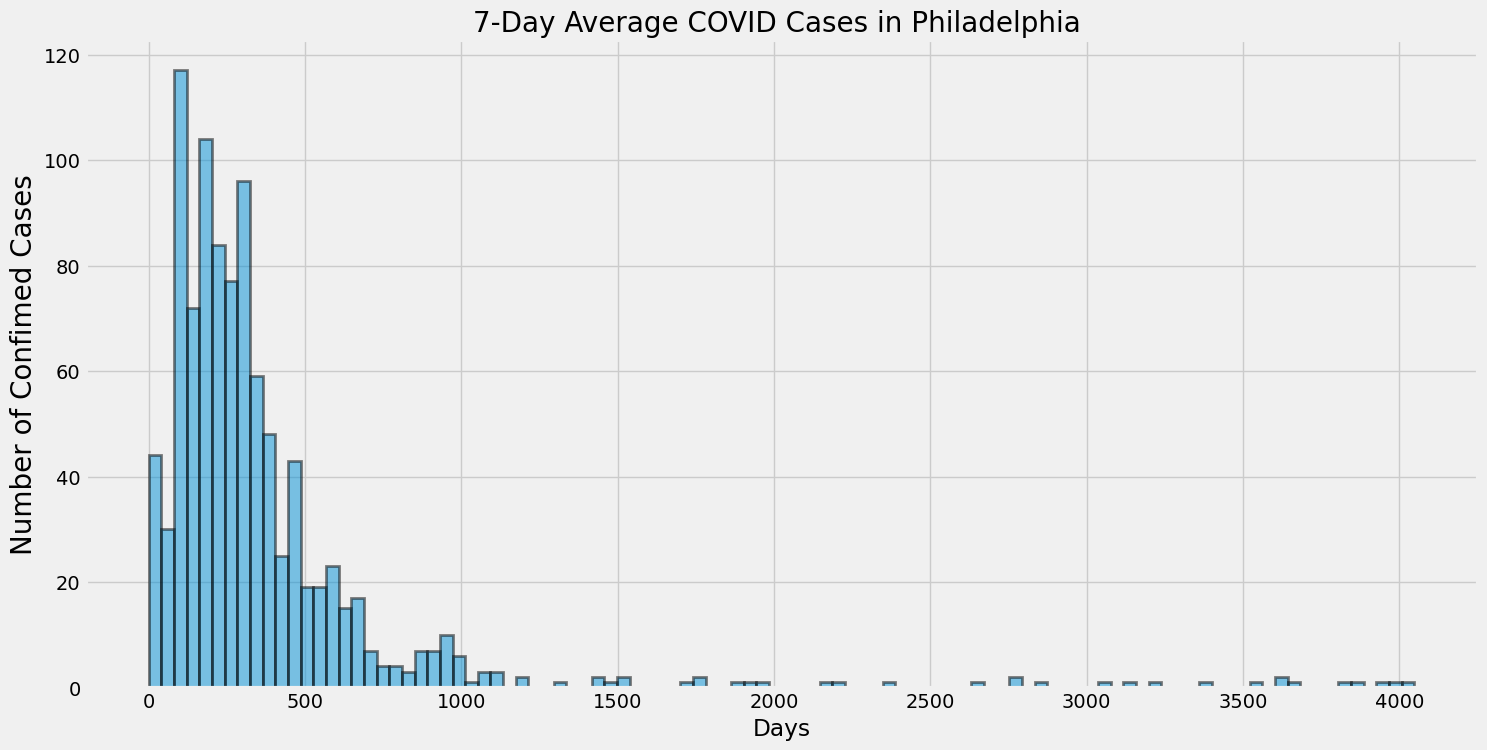

In [27]:
# looking at the distribution of our target variable
target.hist(bins=100, figsize=(16, 8), alpha=0.5,
            edgecolor="black", linewidth=2)
plt.title(
    '7-Day Average COVID Cases in Philadelphia ', fontsize=20)
plt.xlabel('Days')
plt.ylabel('Number of Confimed Cases', fontsize=20)

Text(0.5, 1.0, 'New Daily COVID-19 Cases in Philadelphia')

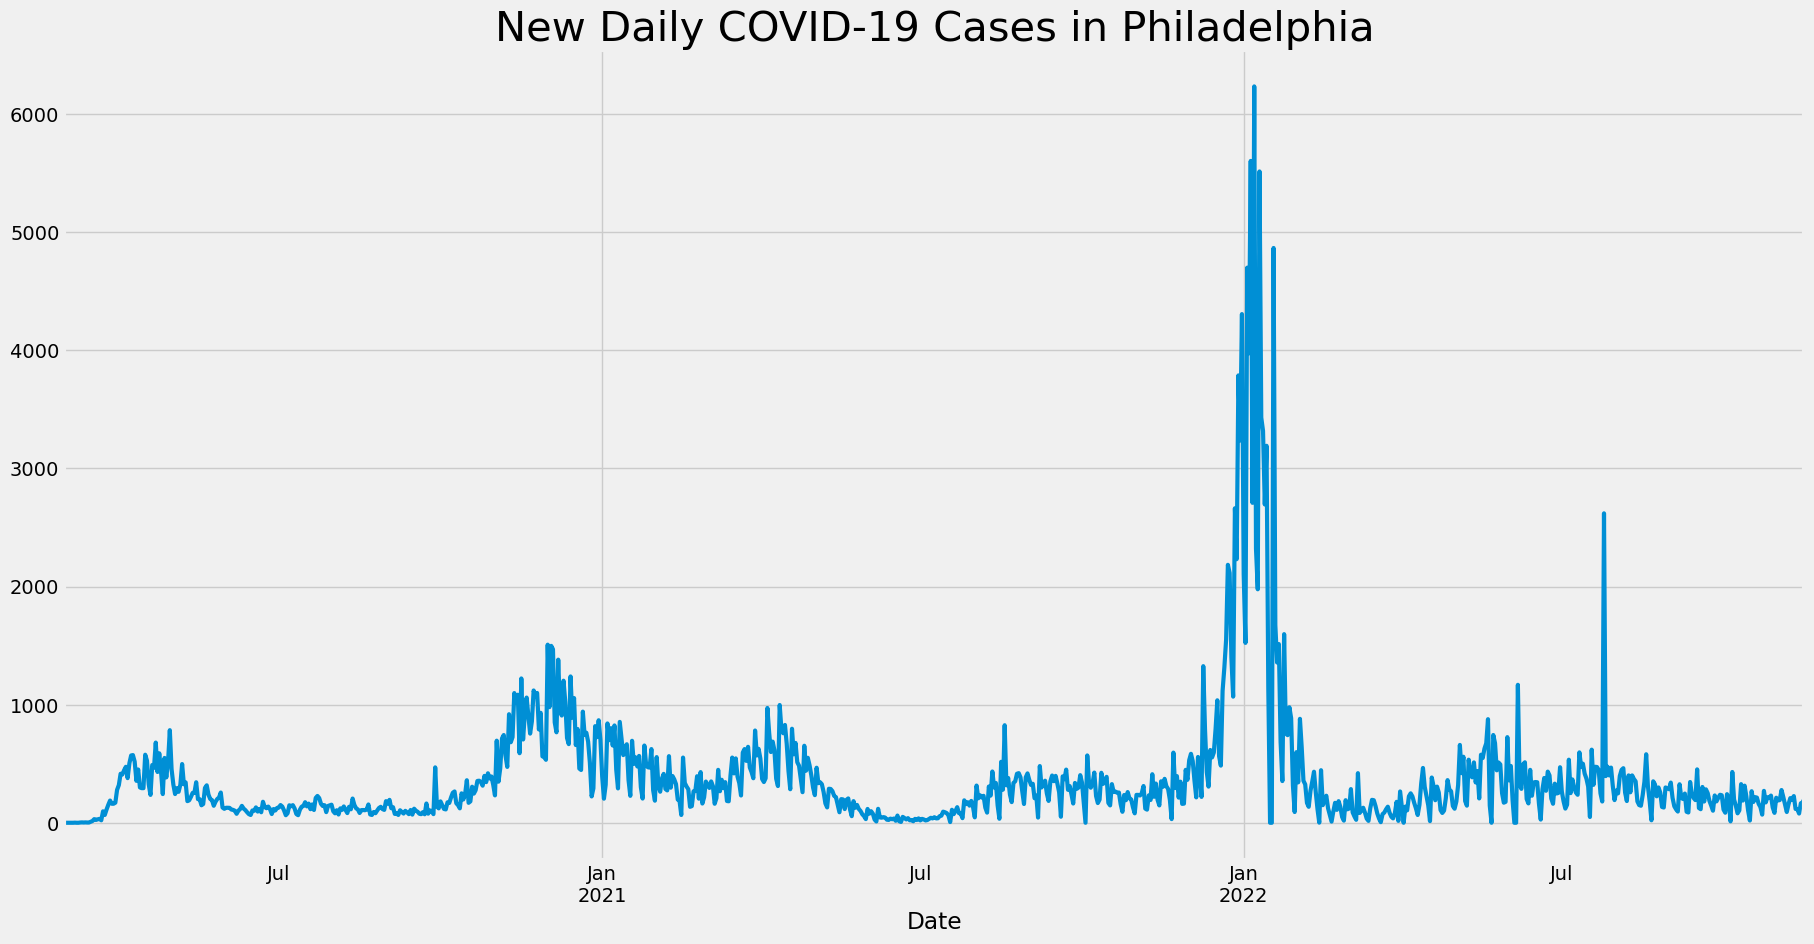

In [28]:
# look at the raw data
ax = public_philly['New Cases'].plot(figsize=(20, 10), linewidth=3)
plt.title('New Daily COVID-19 Cases in Philadelphia', fontsize=30)

Text(0.5, 1.0, '7-day Average New COVID-19 Cases in Philadelphia')

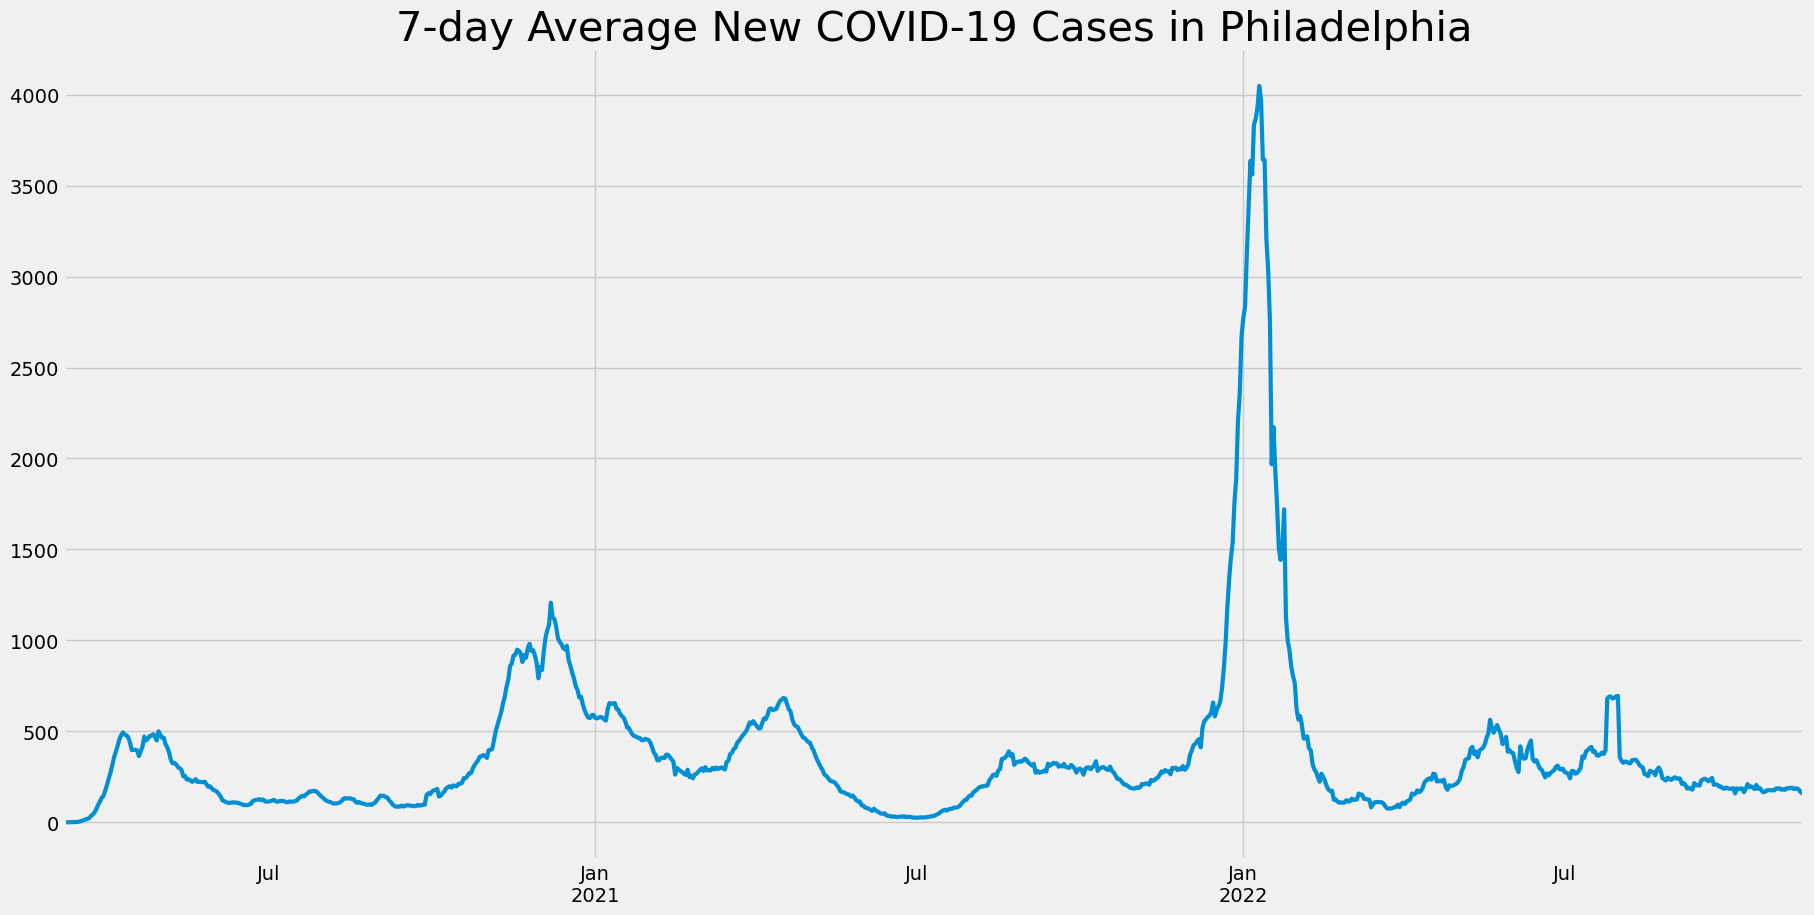

In [29]:
# Look at our target variable
ax = target.plot(figsize=(20, 10), linewidth=3)
plt.title('7-day Average New COVID-19 Cases in Philadelphia', fontsize=30)

### Test Train Split: Target Variable

In [30]:
# this will leave us with 20 days in our test set and 961 in our training set
cutoff_test = 20

X_train = symptoms[:-cutoff_test]
X_test = symptoms[-cutoff_test:]

y_train = target[:-cutoff_test]
y_test = target[-cutoff_test:]

# Base Model of the Target Variable
Now that we've seen the target variable, lets check for stationarity. 

In [31]:
# Dicky Fuller Test for Stationarity
def dicky_fuller(TS):
    """ 
    This function takes in a time series and evaluates it according to the Dicky-Fuller test.
    """
    result = adfuller(TS)
    print('ADF Statistic: %f' % result[0])
    print('p-value: %f' % result[1])
    print('Critical Values:')
    for key, value in result[4].items():
        print('\t%s: %.3f' % (key, value))

In [32]:
# Dicky Fuller Test for Stationarity
dicky_fuller(y_train)

ADF Statistic: -4.014737
p-value: 0.001335
Critical Values:
	1%: -3.437
	5%: -2.865
	10%: -2.568


Our target data is stationary! Lets do a grid search for the optimal orders for our data. 

In [33]:
# origionally all of the max elements were set to 5, but that took 2+ hours to run, so I lowered it to 3
def sarima_elements(TS):
    '''
This function will calculate the optimal elements to use in our model. The model we will be using following 
this function requires both the time series and the order of elements in order to create the model. 

An ARIMA model requires 3 elements - p, d, and q. This function will cycle through all numbers between 0-2 
to find the optimal values for these elements.

p - this is the order of the auto-regressive (AR) part of the ARIMA model. This states the lag we want to 
incorporate into our model, thereby enabling our model to take the past into consideration. 
d - integrated (I) part of the model, which states the order of 
how many times the model has been differenced to find optimal  stationarity.
q - this is the moving average (MA) order of the ARIMA model, which represents the error found in the model. 

The seasonal ARIMA contains these three elements along with a seasonal element, set here as 52, to represent 
the approximate number of weeks in a year.  
    '''
    auto = pm.auto_arima(TS, start_p=4, start_q=0, max_p=7,
                         max_q=3, max_d=3, start_P=0, start_Q=0, max_P=3,
                         max_Q=3, m=52, max_order=None, stepwise=True,
                         trace=True, random_state=42)
    return auto

In [34]:
# note: running this cell takes +- 20 min
target_elements = sarima_elements(y_train)

Performing stepwise search to minimize aic
 ARIMA(4,0,0)(0,0,0)[52] intercept   : AIC=10219.485, Time=0.92 sec
 ARIMA(0,0,0)(0,0,0)[52] intercept   : AIC=14671.621, Time=0.04 sec
 ARIMA(1,0,0)(1,0,0)[52] intercept   : AIC=inf, Time=12.71 sec
 ARIMA(0,0,1)(0,0,1)[52] intercept   : AIC=13466.858, Time=15.73 sec
 ARIMA(0,0,0)(0,0,0)[52]             : AIC=15115.024, Time=0.03 sec
 ARIMA(4,0,0)(1,0,0)[52] intercept   : AIC=10221.237, Time=19.12 sec
 ARIMA(4,0,0)(0,0,1)[52] intercept   : AIC=10221.233, Time=15.01 sec
 ARIMA(4,0,0)(1,0,1)[52] intercept   : AIC=10222.968, Time=43.82 sec
 ARIMA(3,0,0)(0,0,0)[52] intercept   : AIC=10302.137, Time=0.46 sec
 ARIMA(5,0,0)(0,0,0)[52] intercept   : AIC=10200.762, Time=1.88 sec
 ARIMA(5,0,0)(1,0,0)[52] intercept   : AIC=10202.610, Time=36.59 sec
 ARIMA(5,0,0)(0,0,1)[52] intercept   : AIC=10202.609, Time=19.57 sec
 ARIMA(5,0,0)(1,0,1)[52] intercept   : AIC=10204.612, Time=22.25 sec
 ARIMA(6,0,0)(0,0,0)[52] intercept   : AIC=10172.628, Time=1.08 sec
 AR

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                  961
Model:               SARIMAX(7, 0, 3)   Log Likelihood               -5004.812
Date:                Thu, 04 May 2023   AIC                          10033.623
Time:                        08:47:49   BIC                          10092.039
Sample:                             0   HQIC                         10055.868
                                - 961                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept      5.8144      9.004      0.646      0.518     -11.833      23.462
ar.L1          0.1649      0.032      5.160      0.000       0.102       0.228
ar.L2          0.2840      0.027     10.449      0.000       0.231       0.337
ar.L3          0.7038      0.021     33.050      0.000       0.662       0.746
ar.L4          0.2990      0.032      9.280      0.000       0.236       0.362
ar.L5          0.0548      0.013      4.084      0.000       0.028       0.081
ar.L6         -0.1053      0.013     -8.274      0.000      -0.130      -0.080
ar.L7         -0.4400      0.010    -43.880      0.000      -0.460      -0.420
ma.L1          0.8872      0.039     23.010      0.000       0.812       0.963
ma.L2          0.8612      0.029     29.628      0.000       0.804       0.918
ma.L3          0.2514      0.033      7.575      0.000       0.186       0.316
sigma2      1945.4257     30.534     63.713      0.000    1885.580    2005.272
===================================================================================
Ljung-Box (L1) (Q):                   0.00   Jarque-Bera (JB):             58348.79
Prob(Q):                              0.95   Prob(JB):                         0.00
Heteroskedasticity (H):              11.95   Skew:                            -0.80
Prob(H) (two-sided):                  0.00   Kurtosis:                        41.14
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

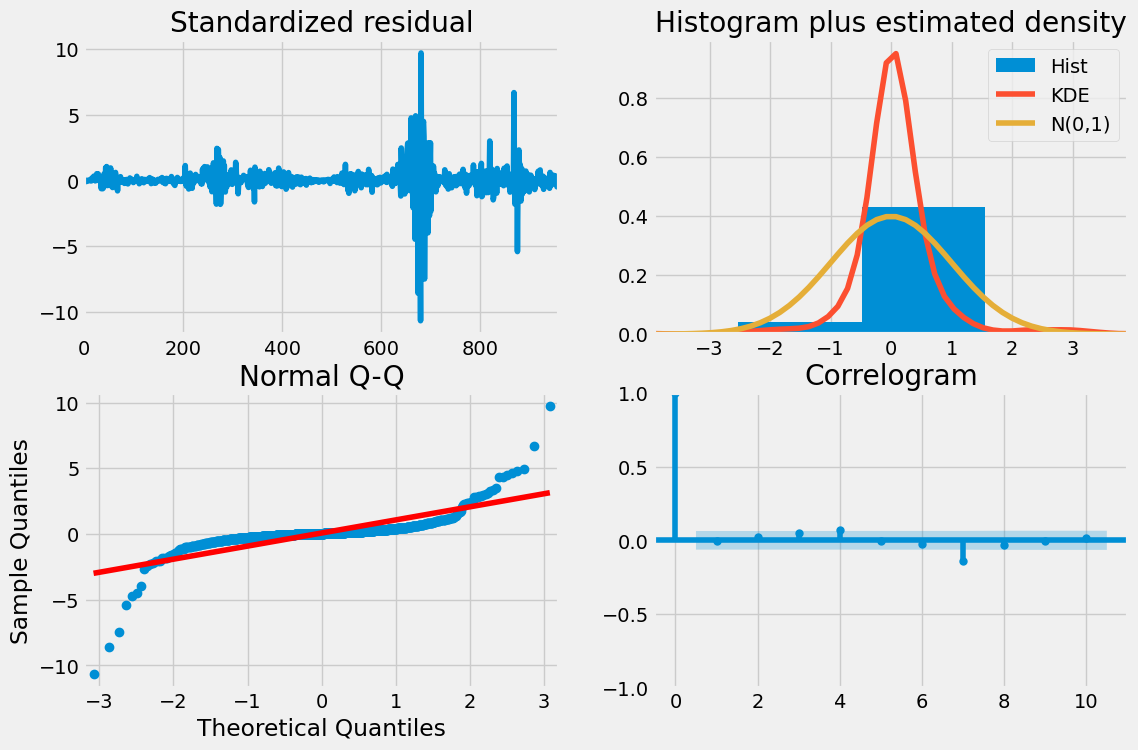

In [35]:
# get the plots and summary about our model
target_elements.plot_diagnostics(figsize=(12, 8))
target_elements.summary()

In [36]:
# getting the first and last date of the test data
last_date_test = y_test.last_valid_index()
first_date_test = y_test.first_valid_index()
print(f" First Date: {first_date_test}, Last Date: {last_date_test}")

 First Date: 2022-10-25 00:00:00, Last Date: 2022-11-13 00:00:00


In [37]:
# creating our baseline ARIMA model for our target data
ARIMA_MODEL = sm.tsa.statespace.SARIMAX((y_train), order=target_elements.order,
                                        seasonal_order=target_elements.seasonal_order, enforce_stationarity=False,
                                        enforce_invertibility=False)

# Fit the model and return the results
output = ARIMA_MODEL.fit()

# forcast
output_forcast = output.forecast(steps=last_date_test)

RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =           11     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  6.14749D+00    |proj g|=  2.52192D-01


 This problem is unconstrained.



At iterate    5    f=  5.67577D+00    |proj g|=  4.35944D-01

At iterate   10    f=  5.24885D+00    |proj g|=  1.98109D-01

At iterate   15    f=  5.19825D+00    |proj g|=  7.42093D-02

At iterate   20    f=  5.19459D+00    |proj g|=  4.95326D-02

At iterate   25    f=  5.19436D+00    |proj g|=  1.25846D-02

At iterate   30    f=  5.19434D+00    |proj g|=  1.33236D-03

At iterate   35    f=  5.19430D+00    |proj g|=  1.49973D-02

At iterate   40    f=  5.19267D+00    |proj g|=  9.81870D-02

At iterate   45    f=  5.18275D+00    |proj g|=  3.62561D-02

At iterate   50    f=  5.18034D+00    |proj g|=  1.46386D-02

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tn

/Users/rachelsanderlin/opt/anaconda3/envs/covid-env-2/lib/python3.9/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


In [38]:
# get the confidence interval for our model
output_conf = output.get_forecast(steps=last_date_test).conf_int()

In [39]:
def plot_model(y_train, y_test, predicted_forcast, title, y_lable, conf_interval=None, cutoff_date=None):
    """ 
    The purpose of this function is to plot both the real and forcasted data for timeseries data. 
    It takes in the training data, the testing data, and the forcasted data. Both the title and y_lable
    must be specified, and a confidence interval and cutoff date are optional parameters. 

    """
    # plotting the prediction
    fig, ax = plt.subplots(figsize=(12, 8))
    # taking only a potion of the data to better show how the predicted data preformed
    ax.plot(y_train[cutoff_date:], label='Training Data')
    ax.plot(y_test, label='Testing Data')
    predicted_forcast.plot(ax=ax, label='Forecasted Data')
    # plotting the confidence interval
    ax.fill_between(conf_interval.index,
                    conf_interval.iloc[:, 0],
                    conf_interval.iloc[:, 1], color='k', alpha=0.25)
    #set max, min amounts of y-axis
    ax.set_ylim([-250, 4100])
    ax.set_title(title, fontsize=30)
    ax.set_xlabel('Dates')
    ax.set_ylabel(y_lable)
    ax.legend(loc='center left', bbox_to_anchor=(1, 0.5))

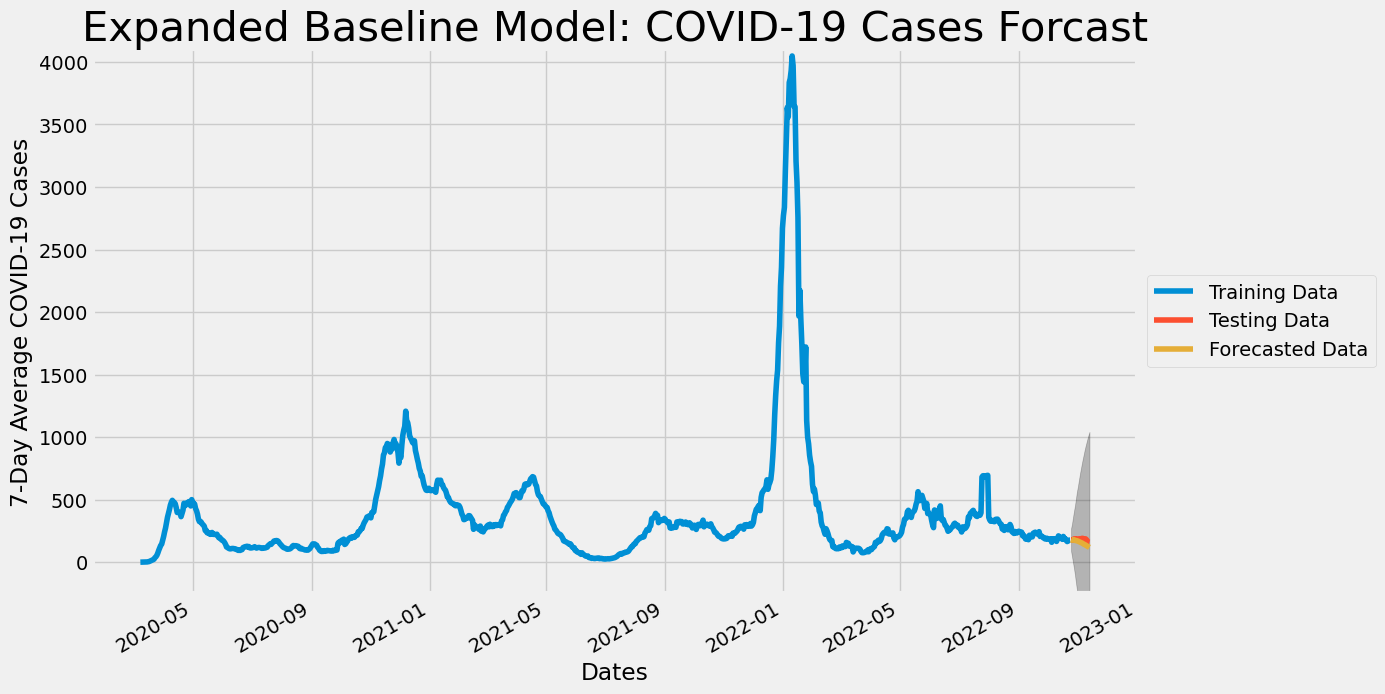

In [40]:
plot_model(y_train, y_test, output_forcast, "Expanded Baseline Model: COVID-19 Cases Forcast",
           '7-Day Average COVID-19 Cases', conf_interval=output_conf)

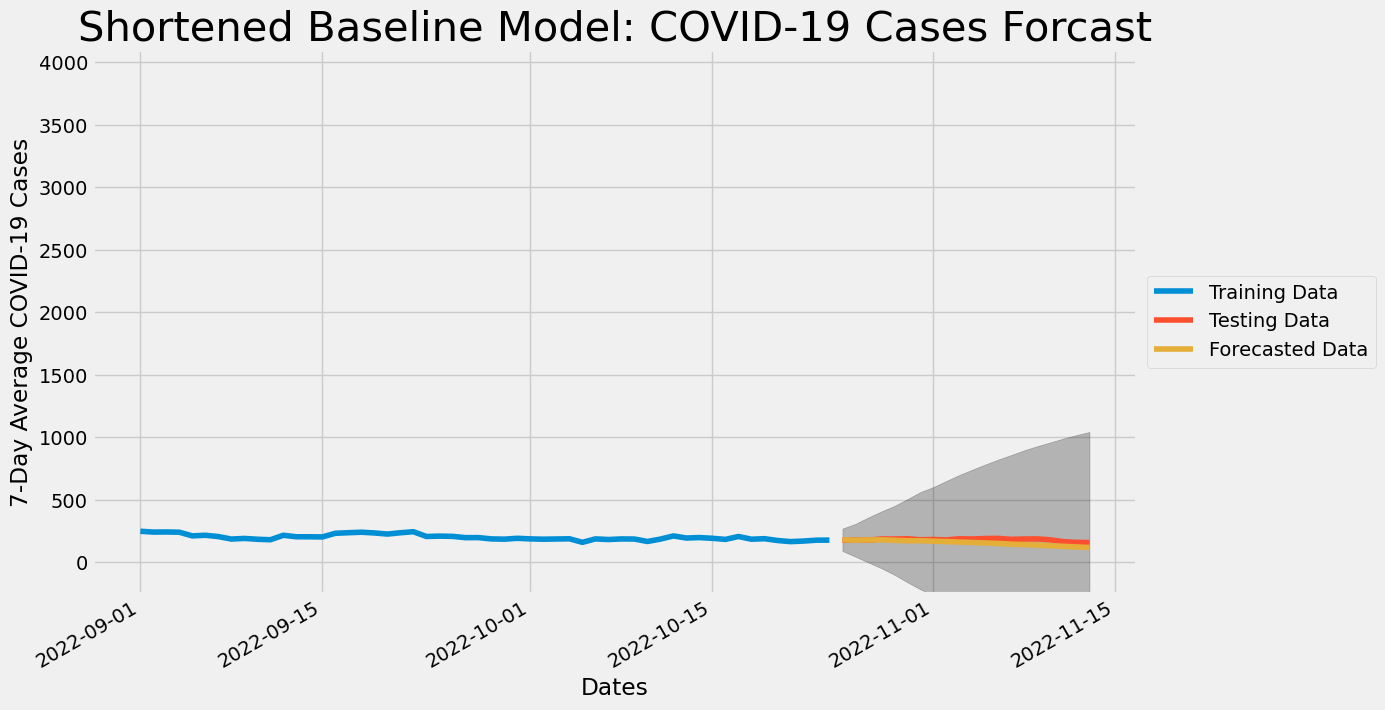

In [41]:
plot_model(y_train, y_test, output_forcast, "Shortened Baseline Model: COVID-19 Cases Forcast",
           '7-Day Average COVID-19 Cases', conf_interval=output_conf, cutoff_date='2022-09-01')

Initially when this data was modeled, the model predicted a straight line. This led to the assumption that something was wrong with the model. We tried rerunning the parameters, subtracting the moving average from the target variable, and taking the log of the target data, but none of these actions significantly improved upon the model. The data was also run through Facebook Prophet in a different notebook (see [here](https://github.com/sanderlin2013/Predicting-COVID-19-in-Philly/blob/main/sandbox/alt_notebook_prophet.ipynb)) and we tried modeling the data pre and post the Omicron spike seen around January 2022 in another notebook as well (see [here](https://github.com/sanderlin2013/Predicting-COVID-19-in-Philly/blob/main/sandbox/alt_notebook_remove_omicron.ipynb)). 

At the end of the day, none of these methods made a difference - the best model we could find used the 7 day average case counts, and the predictions more or less trended towards a straight line during their prediction. This apparently is not a unique occurrence in univariate SARIMA models - in the official [documentation on forecasting in statsmodels](https://www.statsmodels.org/dev/examples/notebooks/generated/statespace_forecasting.html#Prediction-vs-Forecasting) it states, specifically about a straight line SARIMAX forcast: "The forecast above may not look very impressive, as it is almost a **straight line**. This is because this is a very simple, univariate forecasting model. Nonetheless, *keep in mind that these simple forecasting models can be extremely competitive*."

For more information on this phenomenon, feel free to read more [here](https://github.com/statsmodels/statsmodels/issues/3852). 

Finally, it became clear that what was most affecting my predictions was that the model was trying to predict too far into the future. By reducing the test data from 20% of the dataset (almost 100 days) to 20 days, the model performance vastly improved. 

Lets look at some loss functions to assess how well the model preformed. 


In [42]:
# https://stackoverflow.com/questions/3308102/how-to-extract-the-n-th-elements-from-a-list-of-tuples
forcast_date_list = list(output_forcast.items())
n = 1
forcast_list = [x[n] for x in forcast_date_list]

In [43]:
print('MAE:', np.mean(abs(forcast_list - y_test.values)))
print('RMSE:', np.sqrt(np.mean((forcast_list - y_test.values)**2)))
print('MAPE:', np.mean(abs((forcast_list - y_test.values)/y_test.values)))

MAE: 24.85583845359837
RMSE: 29.799693896902426
MAPE: 0.13903013173746206


Based on these error terms and looking at the plot of our model, we can see that our model isn't perfect, and like most time series performs worse (the confidence interval widens) the farther out we try to predict the data. 

Lets see if we can improve on these predictions by using a **multivariate time series model**.

# Multivariate Time Series Model

## PCA

The first step to trying out multivariate models is figuring out what variables we would like to include in our model! In our dataset we have over 400 symptoms to consider from the Google dataset - using all of them would be too computationally expensive. Luckily, we can use Principal Component Analysis (PCA) for dimensionality reduction. 

PCA involves transforming a large set of variables into a smaller set of uncorrelated variables while keeping most of the information in the original data. PCA works by identifying the principal components (PCs) of the data, which are linear combinations of the original variables that explain the most variance in the data. The first PC explains the most variance, followed by the second PC, and so on. By selecting only the top few PCs, we can reduce the dimensionality of the data while retaining most of the important information.

The goal was to reduce the dimensions of our data into a manageable number of components and then hopefully use those components to build a better but not overly complex Vector Autoregressive (VAR) model. 

The first step in using PCA is figuring out how many components we would want the PCA to sort our data into. 

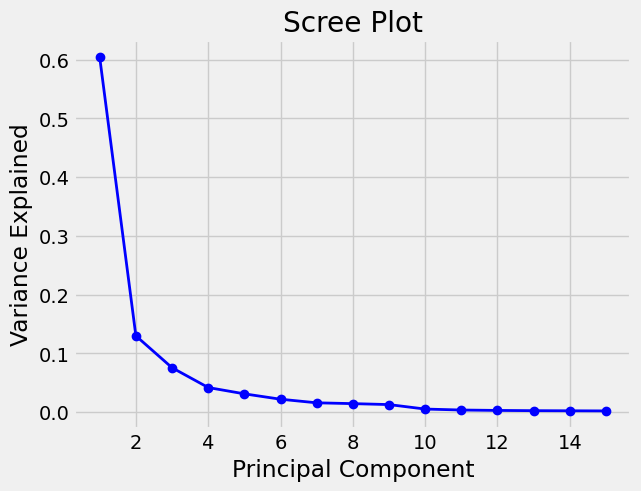

In [44]:
# perform PCA on training data
pca = PCA(n_components=15).fit(X_train)
# plot scree plot
PC_values = np.arange(pca.n_components_) + 1
plt.plot(PC_values, pca.explained_variance_ratio_,
         'o-', linewidth=2, color='blue')
plt.title('Scree Plot')
plt.xlabel('Principal Component')
plt.ylabel('Variance Explained')
plt.show()

The number of components we're going to choose will be 2, based on where the scree plot drops off. 

In [45]:
# restructuring our `y_train` data so we can add it to our VAR model later
df_y_train = pd.DataFrame(y_train)
df_y_train = df_y_train.reset_index(names=['date'])
df_y_train

,date,Target
0,2020-03-08,0.1
1,2020-03-09,0.1
2,2020-03-10,0.4
3,2020-03-11,0.9
4,2020-03-12,1.1
...,...,...
956,2022-10-20,173.9
957,2022-10-21,165.0
958,2022-10-22,169.3
959,2022-10-23,176.4


In [46]:
# instantiating the PCA
pca = PCA(n_components=2)
# fitting and transforming the PCA on our training data
principalComponents = pca.fit_transform(X_train)
# dataframe with PC's
df_pca = pd.DataFrame(principalComponents, columns=['PC1', 'PC2'])

# creating on dataframe, with the dates as an index
principalComponents = pd.concat([df_y_train, df_pca], axis=1)
principalComponents.set_index('date', inplace=True)

In [47]:
principalComponents

,Target,PC1,PC2
date,,,
2020-03-08,0.1,23.163343,-0.492309
2020-03-09,0.1,40.021992,0.519253
2020-03-10,0.4,50.712437,0.548543
2020-03-11,0.9,72.832200,0.588393
2020-03-12,1.1,90.530683,0.211749
...,...,...,...
2022-10-20,173.9,4.224713,0.566310
2022-10-21,165.0,4.043852,-0.005439
2022-10-22,169.3,2.355044,-0.628784


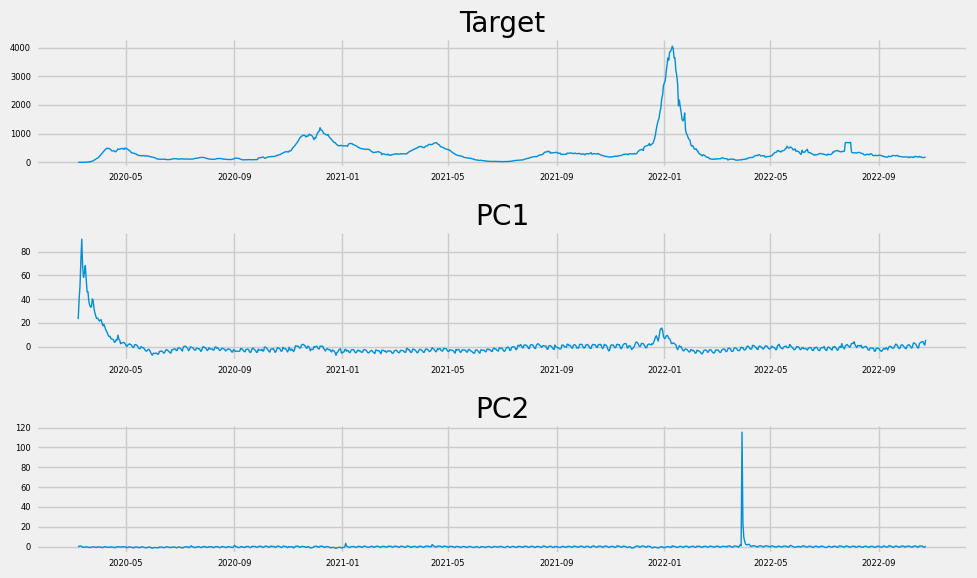

In [48]:
# modeling the PC's and target data
fig, axes = plt.subplots(nrows=3, figsize=(10, 6))
for i, ax in enumerate(axes.flatten()):
    data = principalComponents[principalComponents.columns[i]]
    ax.plot(data, linewidth=1)
    ax.set_title(principalComponents.columns[i])
    ax.xaxis.set_ticks_position('none')
    ax.yaxis.set_ticks_position('none')
    ax.spines["top"].set_alpha(0)
    ax.tick_params(labelsize=6)

plt.tight_layout()

In [49]:
# explained variance for each PC
print(pca.explained_variance_ratio_)

[0.60385586 0.12999278]


These two components explain ~73% of the explained variance. Let's see if these variables are stationary by looking at their Dicky-Fuller scores. 

In [50]:
for col in principalComponents:
    print(col)
    dicky_fuller(principalComponents[col])

Target
ADF Statistic: -4.014737
p-value: 0.001335
Critical Values:
	1%: -3.437
	5%: -2.865
	10%: -2.568
PC1
ADF Statistic: -5.959656
p-value: 0.000000
Critical Values:
	1%: -3.437
	5%: -2.865
	10%: -2.568
PC2
ADF Statistic: -18.063000
p-value: 0.000000
Critical Values:
	1%: -3.437
	5%: -2.865
	10%: -2.568


 Let's further explore these variables using a Granger causality test. 

### Granger Causality Test

What is a Granger causality test? Granger causality is a statistical test that helps determine whether one time series can be used to predict another time series. The test is based on the idea that if time series X "Granger-causes" another time series Y, then information about the past values of X should help predict the future values of Y better than just using information about the past values of Y alone. In other words, if changes in X can be used to predict changes in Y better than simply looking at past values of Y, then X is said to Granger-cause Y.

Here we are going to look at the Granger-cause between our target variable and `PC1`. When looking at these Granger-causes, it's most important to look at the p-values. 

In [51]:
print('7-day Average New Cases causes PC1\n')
print('------------------')
granger_1 = grangercausalitytests(principalComponents[['PC1', 'Target']], 10)

print('\nPC1 causes 7-day Average New Cases\n')
print('------------------')
granger_2 = grangercausalitytests(principalComponents[['Target', 'PC1']], 10)

7-day Average New Cases causes PC1

------------------

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=1.5953  , p=0.2069  , df_denom=957, df_num=1
ssr based chi2 test:   chi2=1.6003  , p=0.2059  , df=1
likelihood ratio test: chi2=1.5989  , p=0.2061  , df=1
parameter F test:         F=1.5953  , p=0.2069  , df_denom=957, df_num=1

Granger Causality
number of lags (no zero) 2
ssr based F test:         F=0.2393  , p=0.7872  , df_denom=954, df_num=2
ssr based chi2 test:   chi2=0.4811  , p=0.7862  , df=2
likelihood ratio test: chi2=0.4810  , p=0.7862  , df=2
parameter F test:         F=0.2393  , p=0.7872  , df_denom=954, df_num=2

Granger Causality
number of lags (no zero) 3
ssr based F test:         F=0.5418  , p=0.6538  , df_denom=951, df_num=3
ssr based chi2 test:   chi2=1.6374  , p=0.6509  , df=3
likelihood ratio test: chi2=1.6360  , p=0.6513  , df=3
parameter F test:         F=0.5418  , p=0.6538  , df_denom=951, df_num=3

Granger Causality
number of lags (no z

Here we see that while there are only a few viable lags when examining if our target variable Granger-causes `PC1` (lags 8, 9, and 10), there are more lags that express that `PC1` Granger-causes our target variable (lags 8, 9, and 10 as well as 7, 2, and 1). 

In short, we may be able to use the lags of the other variable to better model our predictions then if we modeled the variables separately. Because we have more lags that express that `PC1` Granger-causes our target variable, which seems to indicate a higher likelihood that the causality is more weighed in that direction. 

I chose not to run a Granger-causality test on `PC2`, as most of the explained variance (due to the nature of PCA) is in `PC1`. As such, it is highly likely we'll see non-significant Granger-causality between `PC2` and our target variable. 

That being said we will still include `PC2` in our final model as it's interaction terms could aid in making our model more predictive. The hope is that by including `PC1` and `PC2` in our new model, we will create a better but not overly complex model. 

## VAR model

Vector Autoregressive (VAR) models are one type statistical models used to model the behavior of multiple variables over time. In VAR models, each variable is modeled as a linear function of its own past values, as well as the past values of all the other variables in the system. The model assumes that the variables are jointly dependent and that each variable can be explained by the others in the system. VAR models can be used for forecasting and causal analysis. The order of a VAR model specifies the number of lags of each variable that are included in the model. We are going to use a VAR model to see if it can better predict future COVID-19 case rates than our baseline model. 

In [52]:
# creating a dataframe with the variables we want in our VAR model
var_df = principalComponents[['Target', 'PC1', 'PC2']]
var_df

,Target,PC1,PC2
date,,,
2020-03-08,0.1,23.163343,-0.492309
2020-03-09,0.1,40.021992,0.519253
2020-03-10,0.4,50.712437,0.548543
2020-03-11,0.9,72.832200,0.588393
2020-03-12,1.1,90.530683,0.211749
...,...,...,...
2022-10-20,173.9,4.224713,0.566310
2022-10-21,165.0,4.043852,-0.005439
2022-10-22,169.3,2.355044,-0.628784


In [53]:
# instantiating the model
var_model = VAR(var_df)

/Users/rachelsanderlin/opt/anaconda3/envs/covid-env-2/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)


In [54]:
# code inspiration taken from https://github.com/nachi-hebbar/Multivariate-Time-Series-Forecasting

# finding the best order for our VAR model
sorted_order = var_model.select_order(maxlags=20)
print(sorted_order.summary())

 VAR Order Selection (* highlights the minimums)  
       AIC         BIC         FPE         HQIC   
--------------------------------------------------
0        17.76       17.77   5.149e+07       17.76
1        11.05       11.11   6.281e+04       11.07
2        10.96       11.06   5.734e+04       11.00
3        10.81       10.96   4.934e+04       10.87
4        10.69       10.89   4.393e+04       10.77
5        10.60       10.85   4.017e+04       10.70
6        10.42       10.72   3.361e+04       10.53
7        10.41       10.75   3.317e+04       10.54
8        10.14      10.52*   2.523e+04      10.28*
9        10.14       10.57   2.526e+04       10.30
10       10.13       10.61   2.505e+04       10.31
11       10.14       10.67   2.542e+04       10.34
12       10.14       10.71   2.523e+04       10.35
13       10.14       10.76   2.532e+04       10.37
14       10.16       10.82   2.573e+04       10.41
15      10.03*       10.74  2.262e+04*       10.30
16       10.03       10.79   2.

In [55]:
# fitting our VAR model
var_model = VARMAX(var_df, order=(8, 0), enforce_stationarity=True)
fitted_model = var_model.fit(disp=False)
print(fitted_model.summary())

/Users/rachelsanderlin/opt/anaconda3/envs/covid-env-2/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/Users/rachelsanderlin/opt/anaconda3/envs/covid-env-2/lib/python3.9/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


                              Statespace Model Results                              
Dep. Variable:     ['Target', 'PC1', 'PC2']   No. Observations:                  961
Model:                               VAR(8)   Log Likelihood               -9511.624
                                + intercept   AIC                          19185.247
Date:                      Thu, 04 May 2023   BIC                          19579.553
Time:                              08:49:09   HQIC                         19335.400
Sample:                          03-08-2020                                         
                               - 10-24-2022                                         
Covariance Type:                        opg                                         
Ljung-Box (L1) (Q):       0.04, 0.54, 0.12   Jarque-Bera (JB):   58704.18, 90610.94, 32631259.10
Prob(Q):                  0.85, 0.46, 0.73   Prob(JB):                          0.00, 0.00, 0.00
Heteroskedasticity (H): 10.08, 0.20, 41.2

In [56]:
# getting predictions based on the VAR model
predict = fitted_model.get_prediction(
    start=first_date_test, end=last_date_test)
predictions = predict.predicted_mean

# get confidence interval
var_conf_all = fitted_model.get_forecast(steps=last_date_test).conf_int()
var_conf = var_conf_all[["lower Target", "upper Target"]]

In [57]:
# make DataFrame for predictions
predictions.columns = ['Target predicted', 'PC1 predicted', 'PC2 predicted', ]

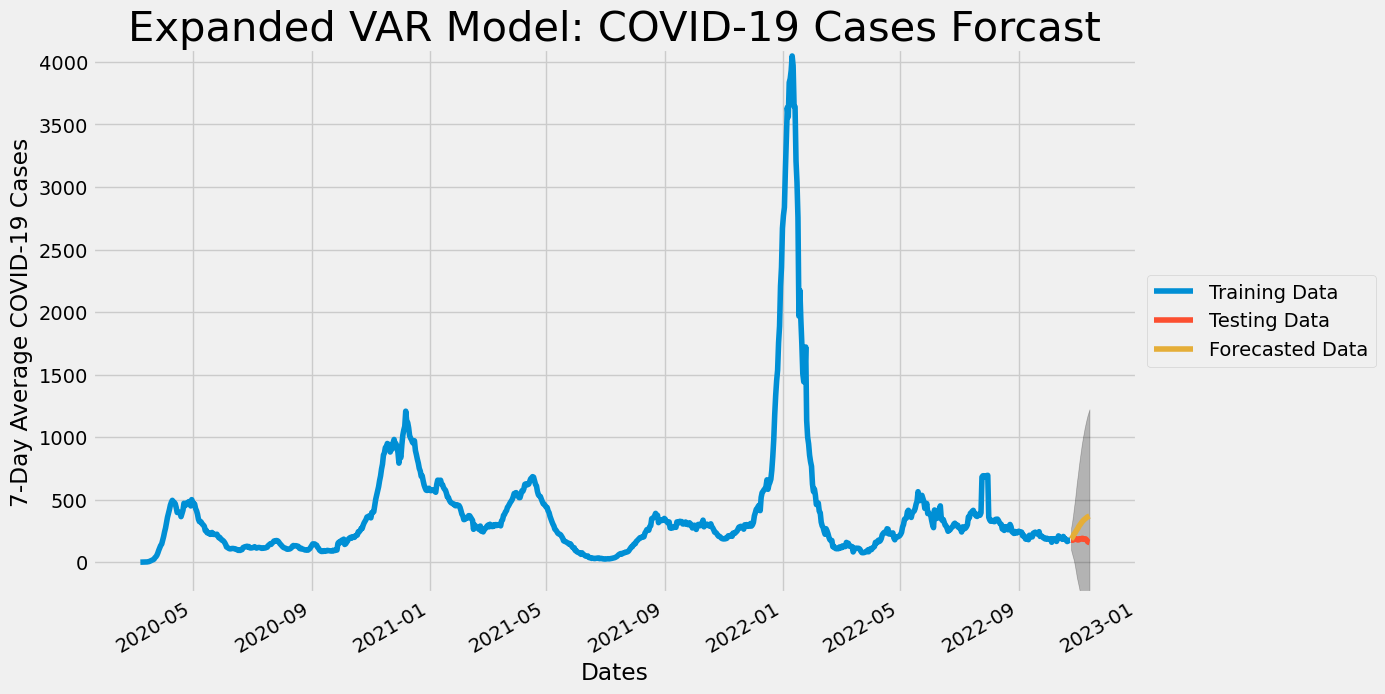

In [58]:
plot_model(var_df["Target"], y_test, predictions["Target predicted"], "Expanded VAR Model: COVID-19 Cases Forcast",
           '7-Day Average COVID-19 Cases', conf_interval=var_conf)

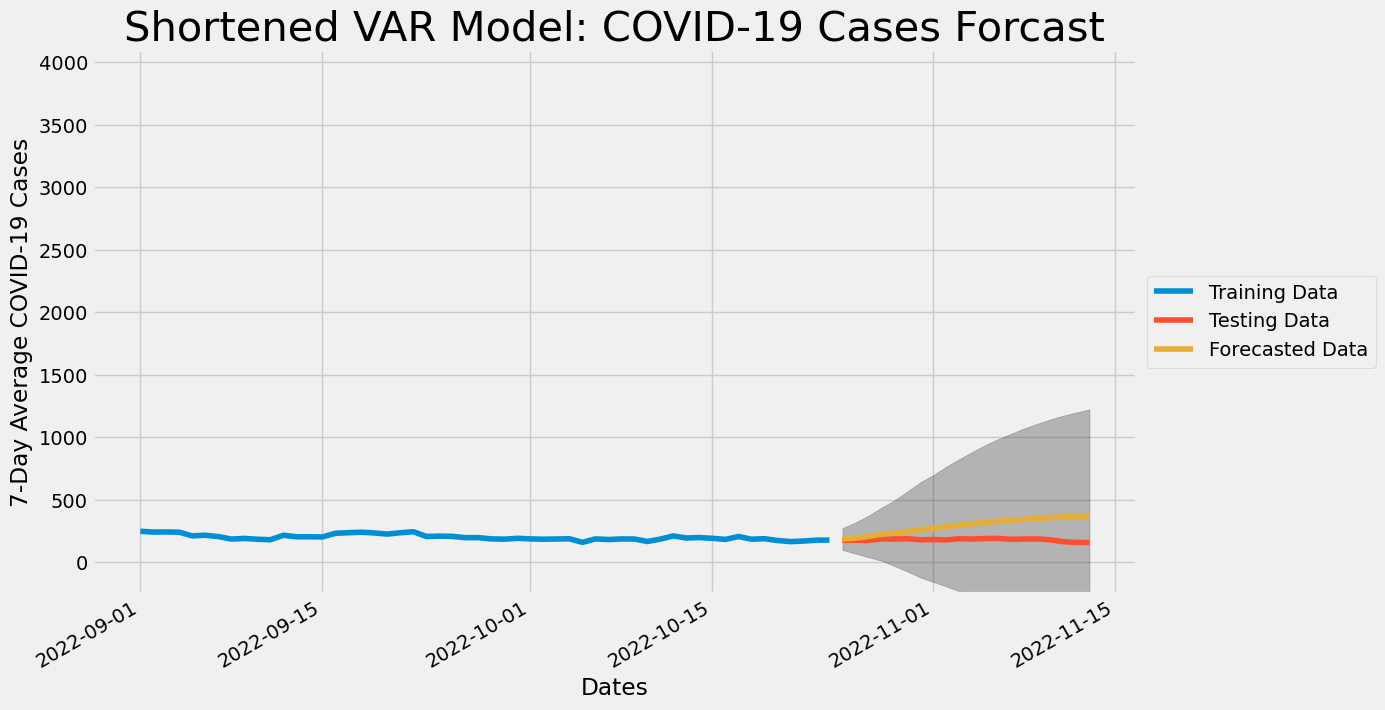

In [59]:
plot_model(var_df["Target"], y_test, predictions["Target predicted"], "Shortened VAR Model: COVID-19 Cases Forcast",
           '7-Day Average COVID-19 Cases', conf_interval=var_conf, cutoff_date='2022-09-01')

# Final Model Evaluation 

In [60]:
# Looking at the loss functions to evaluate how our data preformed
print('MAE:', np.mean(abs(predictions["Target predicted"] - y_test.values)))
print('RMSE:', np.sqrt(
    np.mean((predictions["Target predicted"] - y_test.values)**2)))
print('MAPE:', np.mean(
    abs((predictions["Target predicted"] - y_test.values)/y_test.values)))

MAE: 111.86805828590043
RMSE: 128.18620424895377
MAPE: 0.6321619191326346


All of the above loss functions for our VAR model performed worse compared to the original (base) model. Just a reminder, the original models loss functions were:


In [61]:
print('MAE:', np.mean(abs(forcast_list - y_test.values)))
print('RMSE:', np.sqrt(np.mean((forcast_list - y_test.values)**2)))
print('MAPE:', np.mean(abs((forcast_list - y_test.values)/y_test.values)))

MAE: 24.85583845359837
RMSE: 29.799693896902426
MAPE: 0.13903013173746206


As such, I would say that our VAR model (using the VAR model and PCA the way we did) *did not* have better prediction capabilities than simply modeling the daily COVID-19 cases. 

# Conclusion

## Summary of Analysis 
The analysis began by cleaning and processing the Google COVID-19 search data and the public Pennsylvania COVID-19 data. Both datasets were then subset so as to only include Philadelphia county. These datasets were then joined together. After joining the datasets and creating some initial visualizations of the case counts data, a train-test split was performed. We then used [`pmdarima.arima.auto_arima`](https://alkaline-ml.com/pmdarima/modules/generated/pmdarima.arima.auto_arima.html) to run a grid search. This grid search allowed us to find the optimal orders to model the chosen target variable (`7-Day Average COVID-19 Cases`) using [`statsmodels.tsa.statespace.sarimax.SARIMAX`](https://www.statsmodels.org/dev/generated/statsmodels.tsa.statespace.sarimax.SARIMAX.html#statsmodels.tsa.statespace.sarimax.SARIMAX). This SARIMAX model was our baseline model. We then performed a  scree plot to find the optimal number of components to run in our PCA (Principal Component Analysis). Based on the scree plot we chose to reduce our dimensions to two components. After assessing the principal components, we used them along with our target variable in our VAR (Vector Auto Regression) model. The hope was that by combining the target data along with these two principal components, we would create a better (but not overly complex) model. The VAR model we implemented used [`statsmodels.tsa.statespace.varmax.VARMAX`](https://www.statsmodels.org/dev/generated/statsmodels.tsa.statespace.varmax.VARMAX.html). We used loss functions to evaluate and compare our two models. 

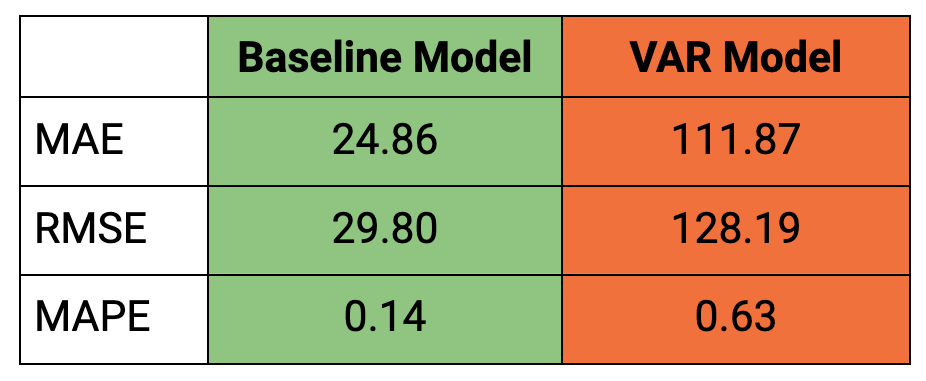

As the baseline model outperformed the VAR model, we *cannot* say that using the Google search trends is helpful in predicting COVID-19 cases, at least with the model created in this notebook. 

## Recommendations

For now, the best way to predict COVID-19 cases in Philadelphia is by looking at Philadelphia's previous COVID-19 cases.

## Next Steps

There are other types of models that may better utilize the COVID-19 Google search data. Trying out these alternate methods were not possible in the time frame allowed for this project, but may give different results. 

Some possible directions to explore: 
- Modeling VARMA or VARMAX models.
- Using crossvalidation and or recursive modeling methods (documentation [here](https://www.statsmodels.org/dev/examples/notebooks/generated/statespace_forecasting.html#Cross-validation)).
- Include other possibly relevant data (e.g. when novel COVID-19 outbreaks happened, public opinion about COVID-19, vaccination rates) which could improve the predictive ability of the model.  
     